In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
import zipfile
import math
from nltk.corpus import stopwords
from string import punctuation
# Specify the path to the zip file you want to unzip
zip_file_path = "/content/A1_DATASET.zip"

# Specify the directory where you want to extract the contents
extracted_dir_path = "/content/A1_DATASET"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extracted_dir_path)

print(f"Successfully extracted contents to {extracted_dir_path}")


Successfully extracted contents to /content/A1_DATASET


In [23]:
 # Read the text dataset file
with open('/content/A1_DATASET/A1_DATASET/train.txt', 'r') as file:
    text = file.read().lower()

# Tokenize the text into words
words = text.split()
english_stopwords = stopwords.words("english")
words = [word for word in words if word not in english_stopwords]
words = [word for word in words if word not in punctuation]


In [24]:
# Total number of words in the dataset
total_words = len(words)
total_words

40673

In [25]:
# Initialize a dictionary to store word frequencies
word_frequencies = {}

# Calculate word frequencies
for word in words:
    if word in word_frequencies:
        word_frequencies[word] += 1
    else:
        word_frequencies[word] = 1

vocabulary_size = len(word_frequencies.keys())

In [31]:
import math
# Initialize a dictionary to store unigram probabilities
unigram_model = {}
unigram_model_addone = {}
unigram_model_addk = {}

k = 0.5
# Calculate unigram probabilities
for word, frequency in word_frequencies.items():
    probability = math.log(frequency) - math.log(total_words)
    unigram_model[word] = probability
    probability_addone = math.log(frequency + 1) - math.log(total_words + vocabulary_size)
    unigram_model_addone[word] = probability_addone
    probability_addk = math.log(frequency + k) - math.log(total_words + k*vocabulary_size)
    unigram_model_addk[word] = probability_addk
unigram_model['<unk>'] = 0
unigram_model_addone['<unk>'] = math.log(1/vocabulary_size)
unigram_model_addk['<unk>'] = math.log(k / (k * vocabulary_size))

In [32]:
print(unigram_model_addone)

{'booked': -6.289928799618918, 'two': -5.89602451391183, 'rooms': -5.447569220872297, 'four': -7.7113144805500795, 'months': -8.558612340937282, 'advance': -8.676395376593666, 'talbott': -7.3885410882870275, 'placed': -8.558612340937282, 'top': -7.042264851569194, 'floor': -5.828583233116297, 'next': -6.073705691149282, 'elevators': -7.259329356807022, 'used': -7.172317979817392, 'night': -5.457519551725466, 'long': -7.066957464159566, 'speaking': -9.369542557153611, 'front': -5.919555011322024, 'desk': -5.6806631030396755, 'told': -6.39912809158391, 'simply': -7.760104644719512, 'honoring': -10.062689737713557, 'request': -7.664794464915186, 'upper': -8.809926769218189, 'requested': -7.200488856784089, 'better': -6.234048341224462, 'view': -6.11144601913213, 'looking': -6.971647284355241, 'brick': -8.809926769218189, 'wall': -7.321849713788356, 'getting': -7.3885410882870275, 'sleep': -7.3885410882870275, 'also': -5.786023618697501, 'received': -7.7113144805500795, 'complaints': -8.19

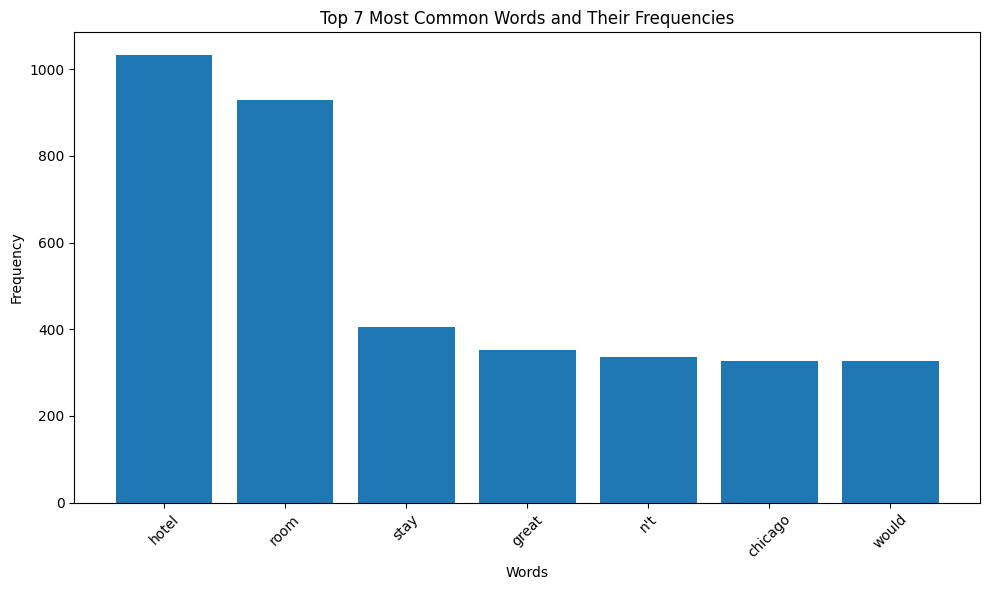

In [33]:
import matplotlib.pyplot as plt

# Sort the word frequencies by descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Take the top 7 most common words
top_words = sorted_word_frequencies[:7]

# Separate the words and frequencies
words, frequencies = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words and Their Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        return text
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

def calculate_perplexity(text, probabilities):
    unigrams = text.lower().split()
    unigrams = [word for word in unigrams if word not in english_stopwords]
    unigrams = [word for word in unigrams if word not in punctuation]
    likelihood = 0
    N = len(unigrams)

    for unigram in unigrams:
        if unigram in probabilities.keys():
          probability = probabilities[unigram]  # Use a small default probability for unknown bigrams
        else:
          # probability = probabilities['<unk>']
          probability = 0
        likelihood -= probability

    perplexity = 2**(likelihood / N)
    # perplexity = 1/N * likelihood
    return perplexity

# Usage example
file_path = '/content/A1_DATASET/A1_DATASET/val.txt'  # Replace with the path to your validation text file
validation_text = read_text_file(file_path)

if validation_text:
    perplexity = calculate_perplexity(validation_text, unigram_model)  # Assuming you have the bigram_probabilities dictionary
    print(f"UnSmoothed Unigram Model Perplexity: {perplexity:.2f}")
    perplexity = calculate_perplexity(validation_text, unigram_model_addone)  # Assuming you have the bigram_probabilities dictionary
    print(f"Laplace Smoothed Unigram Model Perplexity: {perplexity:.2f}")
    perplexity = calculate_perplexity(validation_text, unigram_model_addk)  # Assuming you have the bigram_probabilities dictionary
    print(f"Add K Smoothed Unigram Model Perplexity: {perplexity:.2f}")

UnSmoothed Unigram Model Perplexity: 94.51
Laplace Smoothed Unigram Model Perplexity: 97.62
Add K Smoothed Unigram Model Perplexity: 95.95
